In [201]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/Big_analytics_project/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,...,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,...,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.9,Saturday,January,2,394,...,859493,95,9090,596341,79,11,11,13,6,33
3,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.10,Sunday,January,3,205,...,859493,95,9090,596341,79,11,11,13,6,33
4,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.11,Monday,January,4,246,...,859493,95,9090,596341,79,11,11,13,6,33


#### 영화 개봉전 배급사의 전략 -> 누구를 타겟팅해야할까?
* 1. 장르별 감상포인트는 어떻게 다를것인가?
* Direct는 연출,
* Act는 연기,
* Story는 이야기,
* Visual은 시각적 요소,
* OST는 음악적 요소를 중점적으로 다룹니다.

#### 대중은 모두 동질한가? -> 대중성이란 존재하는가?
* 10대 ~ 20대가 주도하는 시장에 나머지 세대를 끌어들려야 한다.
* 30대 ~ 60대의 고객층을 잡아야 하지 않을까?

In [202]:
# 장르별 감상포인트
#df[df['movie_title']=='리얼'][['NTZ_direct_point','NTZ_act_point','NTZ_story_point','NTZ_visual_point','NTZ_ost_point']]

#### 드랍률로 영화 쪼개기 -> 극장에서 살아남는 영화
* 2주 이내로 상영하고 사라질 것인가 혹은 4주 이상 장기 상영을 할 것인가? -> 45%

In [203]:
import pandas as pd

def calculate_drop_point(df, movie_title):
    """
    영화의 drop_point를 계산하는 함수.
    
    Args:
    df (pd.DataFrame): 데이터프레임 (columns: 'movie_title', 'DoW', '관객수')
    movie_title (str): 분석할 영화 제목
    
    Returns:
    float: drop_point 값
    """
    # 1. 필요한 데이터 필터링
    movie_weekend = df[
        (df['movie_title'] == movie_title) &
        (df['DoW'].isin(['Friday', 'Saturday', 'Sunday']))
    ].reset_index(drop=True)
    
    # 데이터 검증: 주차별 데이터가 충분한지 확인
    if len(movie_weekend) < 6:
        raise ValueError("데이터가 충분하지 않습니다. 최소 첫째 주와 둘째 주의 주말 관객수 데이터가 필요합니다.")
    
    # 2. 주차별 주말 관객 수 계산
    첫째주_주말_관객수 = movie_weekend.iloc[0:3]['관객수'].sum()
    둘째주_주말_관객수 = movie_weekend.iloc[3:6]['관객수'].sum()
    
    # 3. drop_point 계산
    drop_point = 1 - (둘째주_주말_관객수 / 첫째주_주말_관객수)
    
    return drop_point


In [204]:
# 안정적인 drop_ratio를 가진 영화 찾기
stable_drop_ratio = []
unstable_drop_ratio = []

# df에서 영화 제목을 가져와서 drop_point 계산
movie_title = df['movie_title'].unique()
for i in movie_title:
    drop_point = calculate_drop_point(df, i)
    if drop_point < 0.45:
        stable_drop_ratio.append(i)
    else:
        unstable_drop_ratio.append(i)

In [205]:
# df에서 stable_drop_ratio에 있는 영화들로 필터링
df_stable = df[df['movie_title'].isin(stable_drop_ratio)].reset_index(drop=True)
df_stable

# 불안정한 drop_ratio를 가진 영화 찾기 -> 
df_un_stable = df[df['movie_title'].isin(unstable_drop_ratio)].reset_index(drop=True)
df_un_stable

,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,...,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,...,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.9,Saturday,January,2,394,...,859493,95,9090,596341,79,11,11,13,6,33
3,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.10,Sunday,January,3,205,...,859493,95,9090,596341,79,11,11,13,6,33
4,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.11,Monday,January,4,246,...,859493,95,9090,596341,79,11,11,13,6,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,183850,20199951,애나벨 집으로,2019.6.26,Wednesday,2019.7.6,Saturday,July,10,25,...,908286,112,9090,596341,79,28,12,5,19,24
4226,183850,20199951,애나벨 집으로,2019.6.26,Wednesday,2019.7.7,Sunday,July,11,29,...,908286,112,9090,596341,79,28,12,5,19,24
4227,183850,20199951,애나벨 집으로,2019.6.26,Wednesday,2019.7.8,Monday,July,12,16,...,908286,112,9090,596341,79,28,12,5,19,24
4228,183850,20199951,애나벨 집으로,2019.6.26,Wednesday,2019.7.9,Tuesday,July,13,18,...,908286,112,9090,596341,79,28,12,5,19,24


In [206]:
# 안정적인 drop_ratio를 가진 영화들의 평균 관객수
df_stable.groupby('movie_title')['관객수'].sum().sort_values(ascending=False)
# 불안정한 drop_ratio를 가진 영화들의 평균 관객수
#b = df_un_stable.groupby('movie_title')['관객수'].sum().sort_values(ascending=False)
#b[b > 1000000]

movie_title
극한직업        10508166
택시운전사        9141983
검사외전         8486030
기생충          7647105
밀정           6333478
              ...   
저수지 게임        100473
더 테이블          76999
가버나움           71819
파리로 가는 길       69065
당갈             50108
Name: 관객수, Length: 127, dtype: int64

#### 안정적인 drop_ratio를 가진 영화들의 평균 관객수 분포를 살펴보자

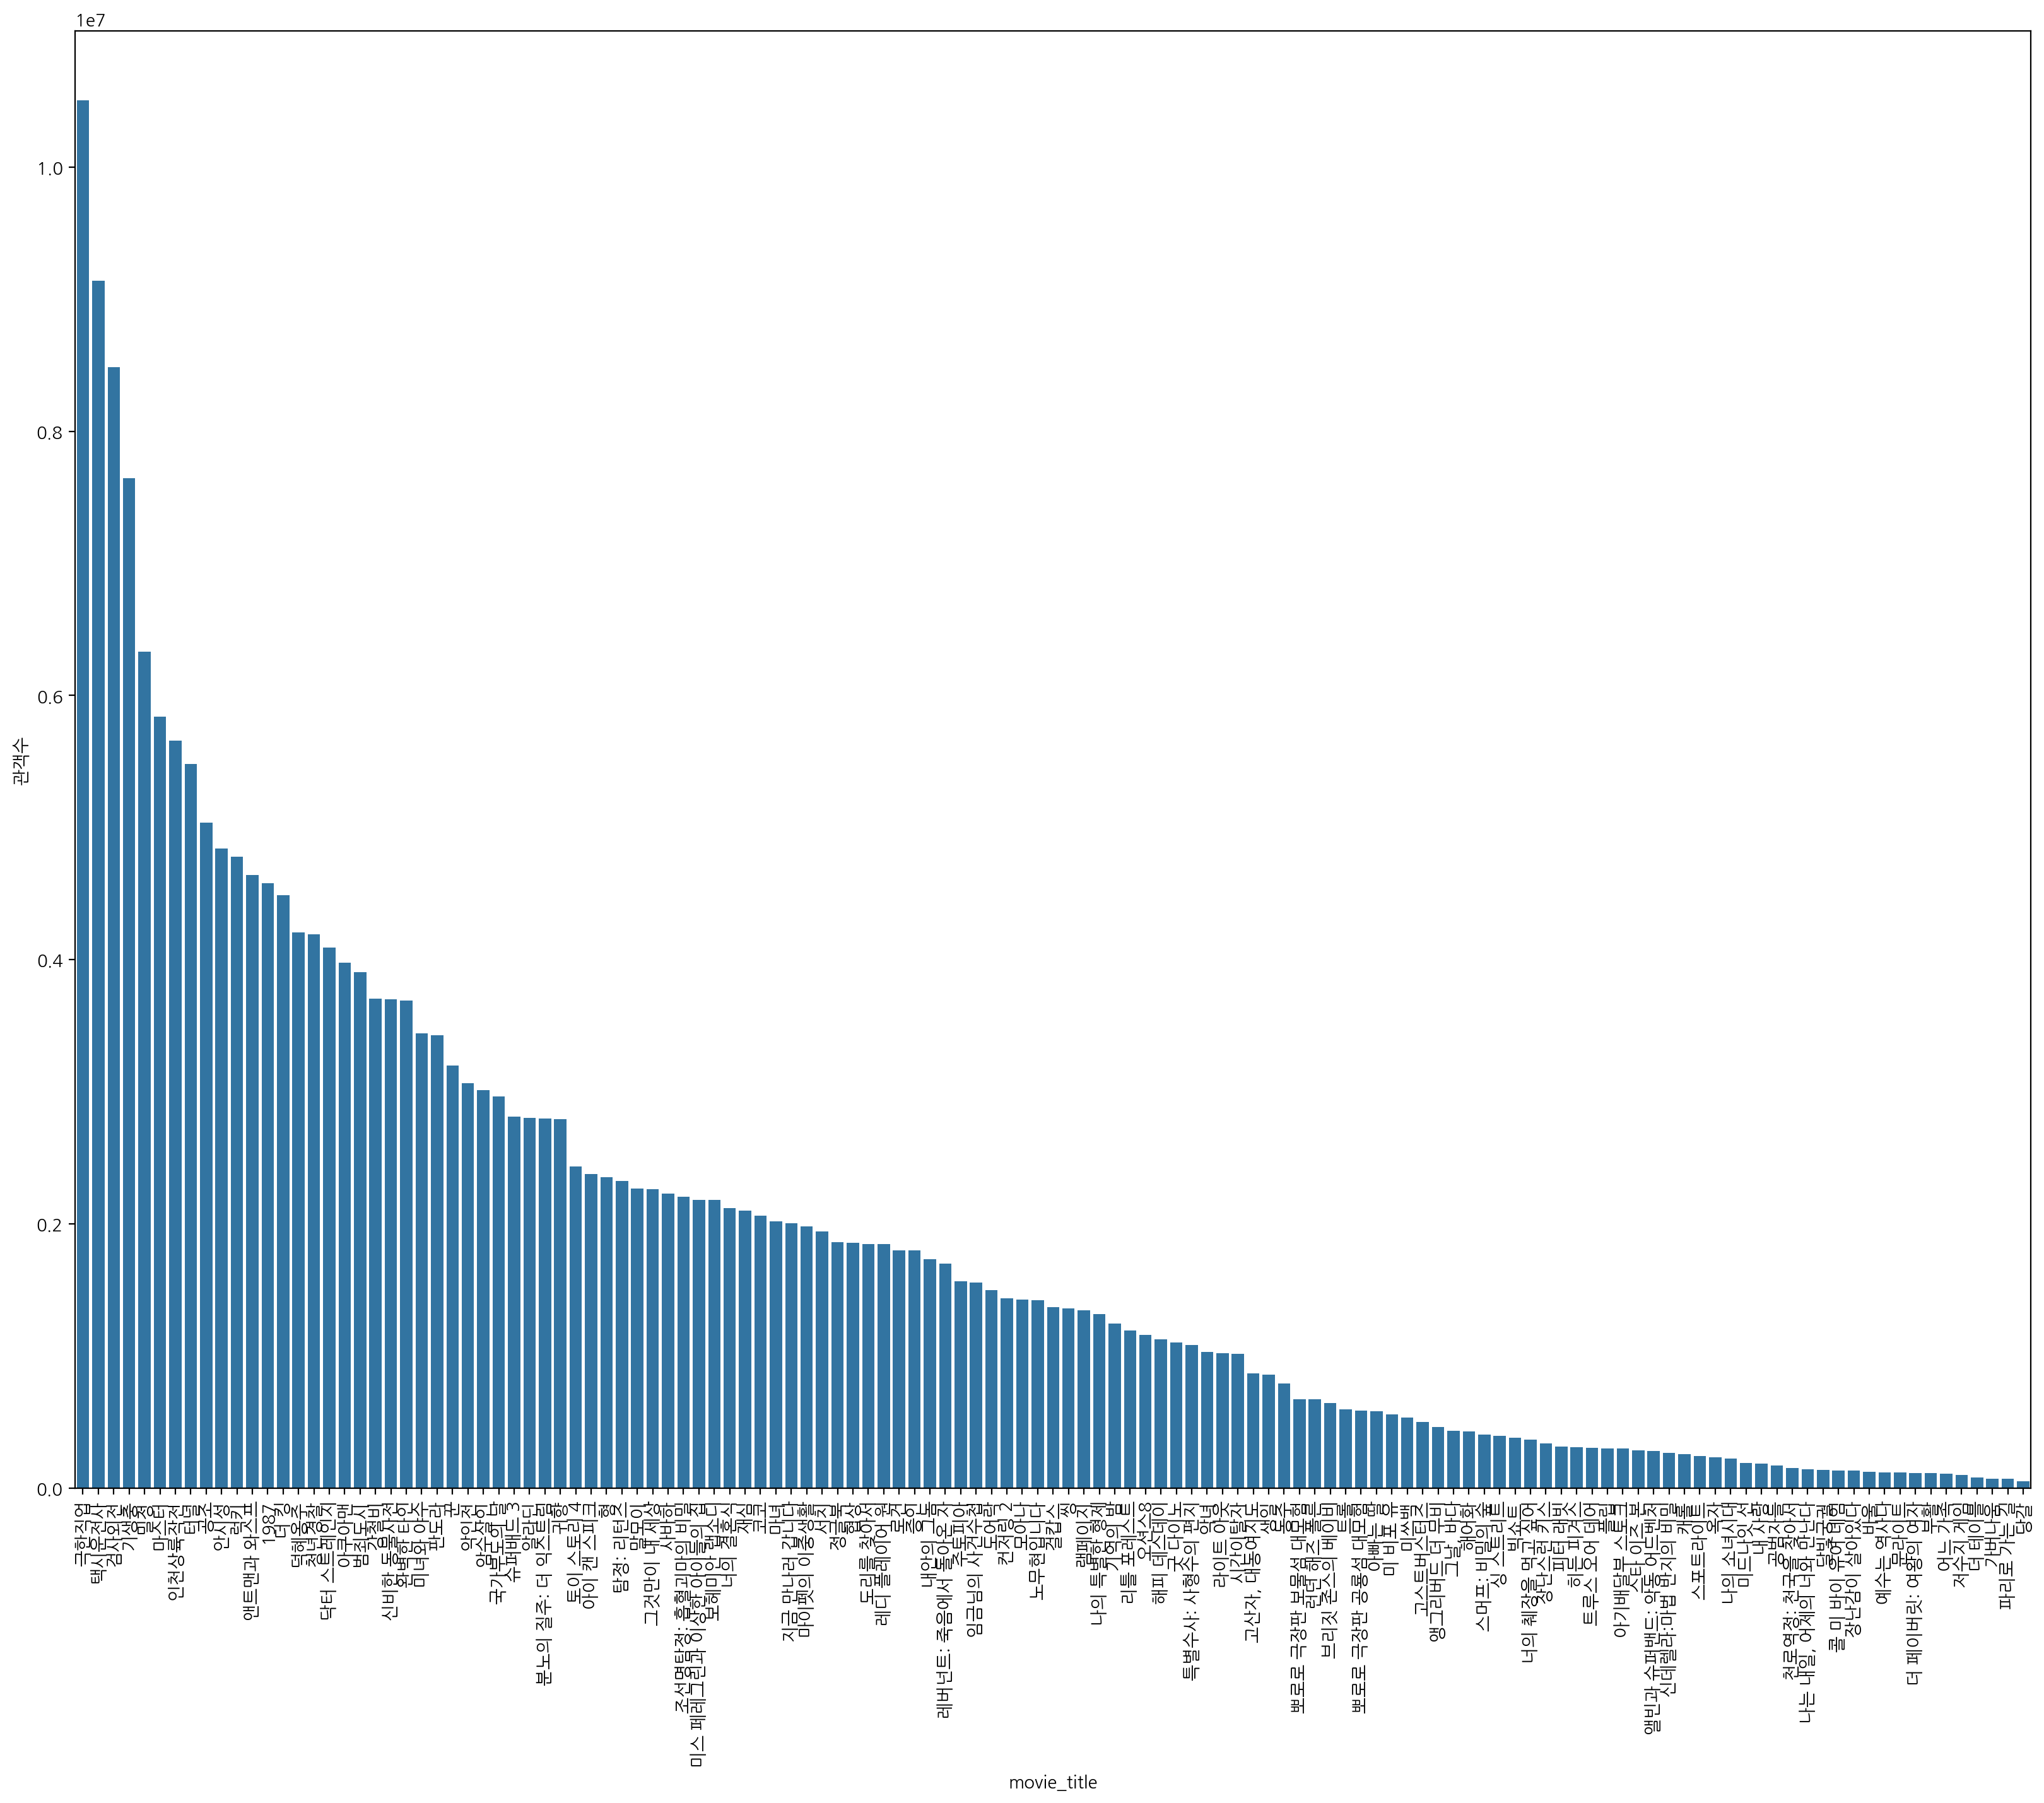

In [207]:
# 시각화를 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 안정적인 drop_ratio를 가진 영화들의 평균 관객수 시각화, x축 90도 회전
plt.figure(figsize=(20, 15))
sns.barplot(data=df_stable.groupby('movie_title')['관객수'].sum().sort_values(ascending=False).reset_index(), x='movie_title', y='관객수')
plt.xticks(rotation=90)
plt.show()

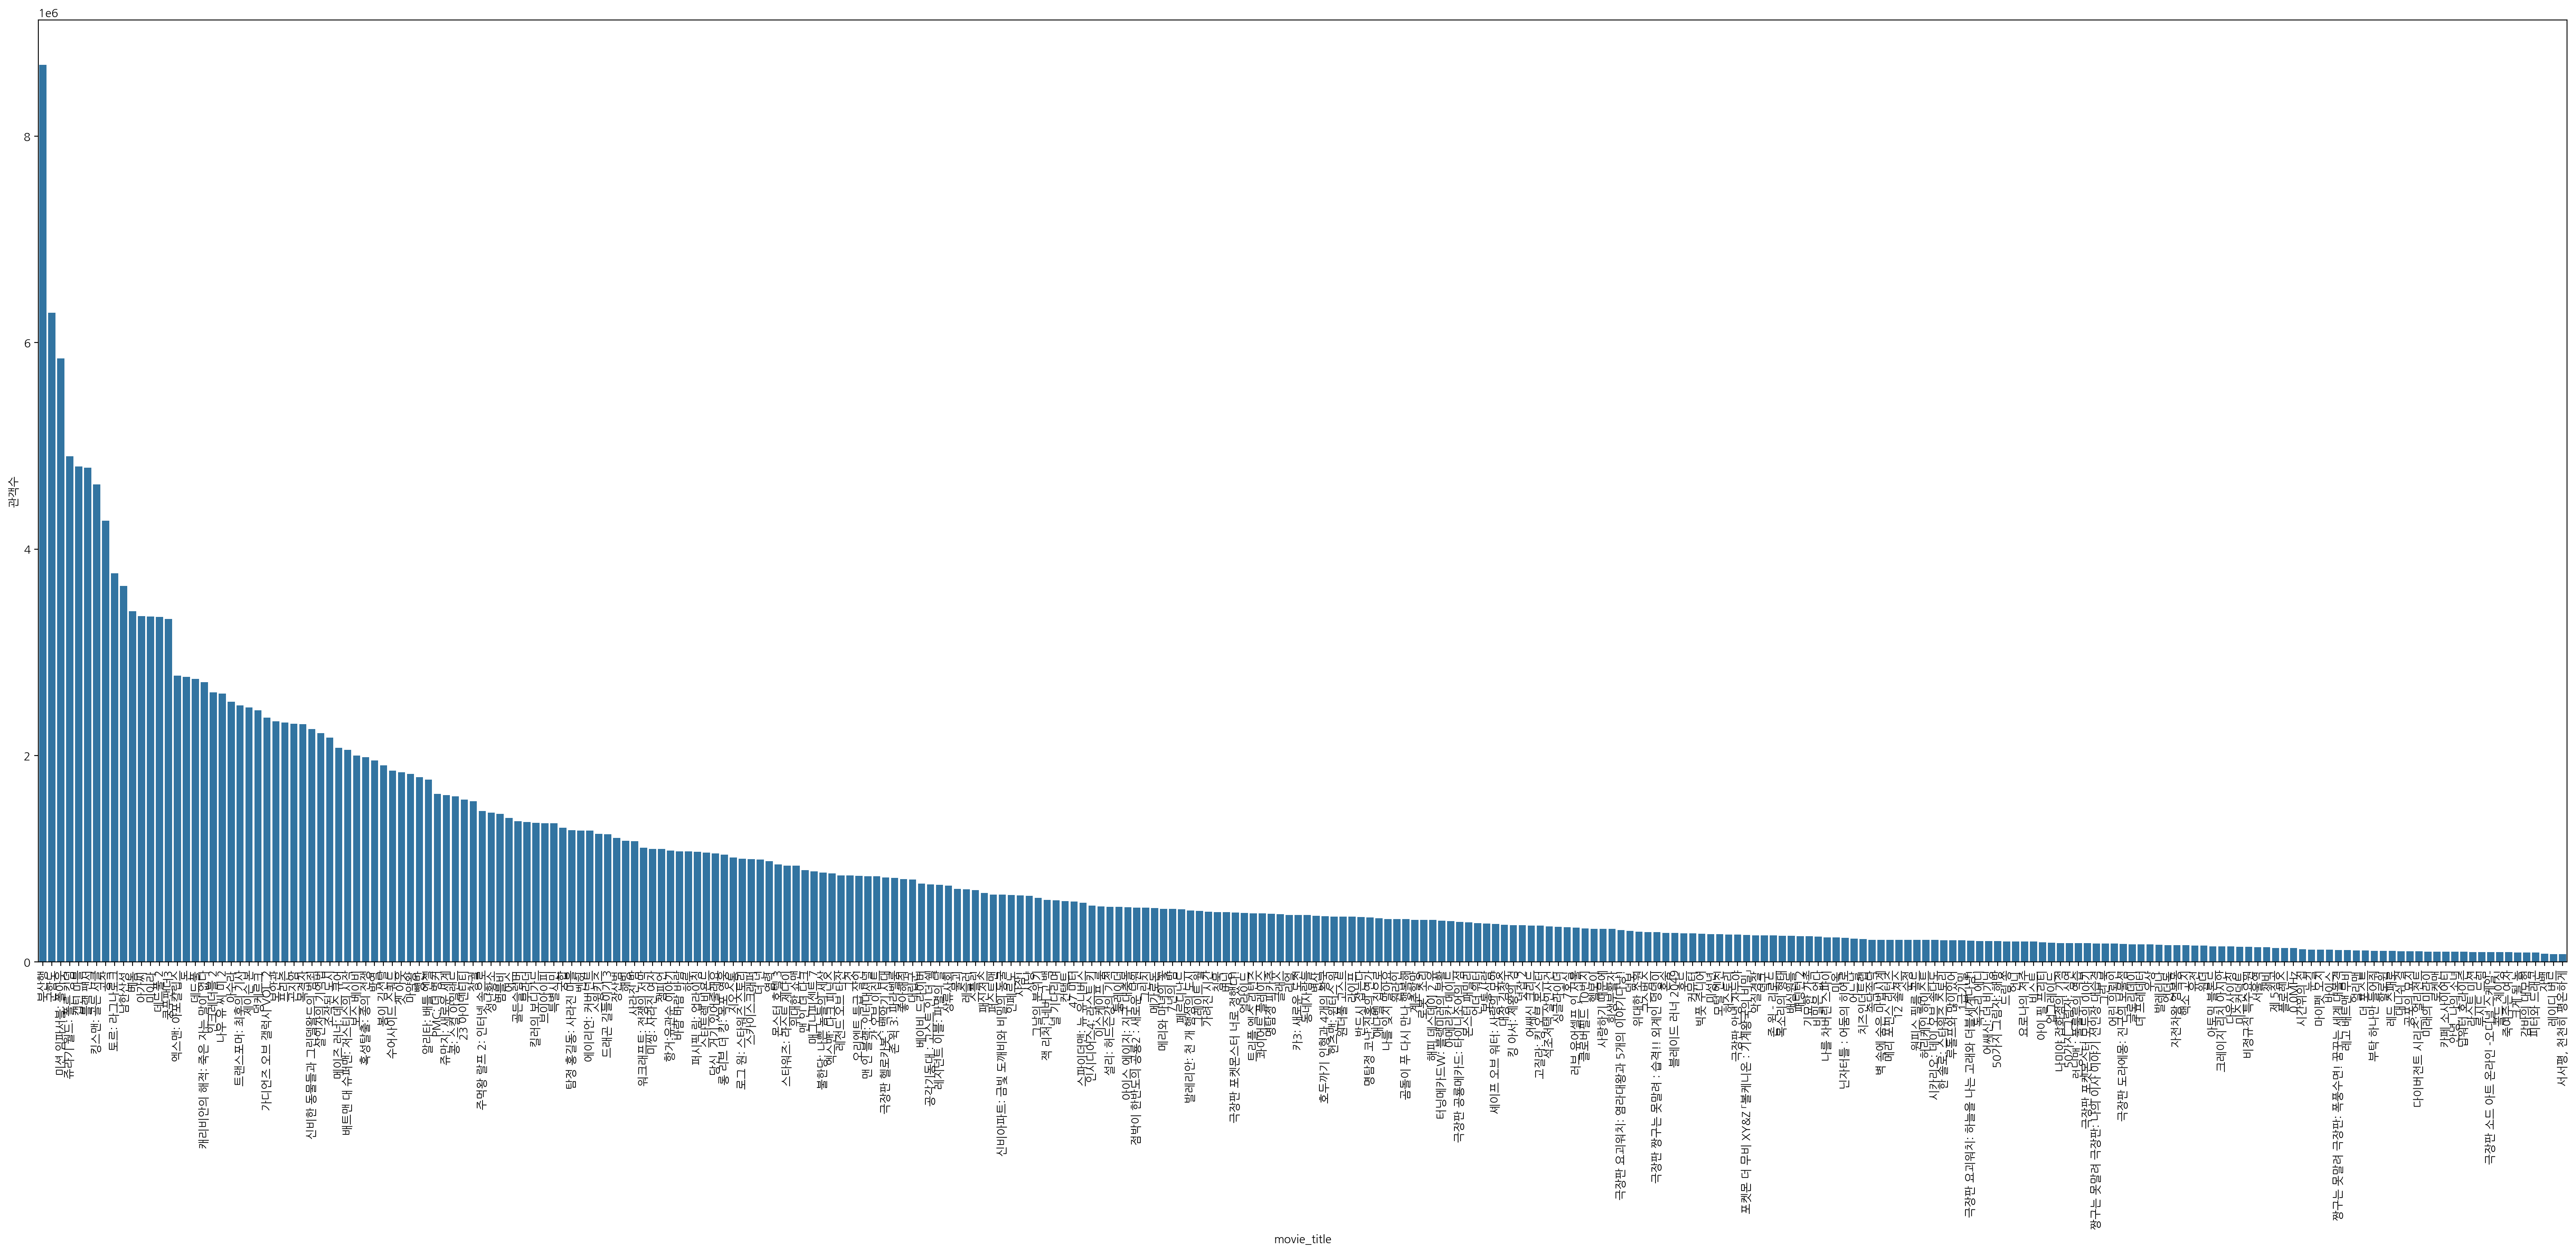

In [208]:
# 시각화를 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 안정적인 drop_ratio를 가진 영화들의 평균 관객수 시각화, x축 90도 회전
plt.figure(figsize=(40, 15))
sns.barplot(data=df_un_stable.groupby('movie_title')['관객수'].sum().sort_values(ascending=False).reset_index(), x='movie_title', y='관객수')
plt.xticks(rotation=90)
plt.show()

#### 안정적인 드랍율을 보이는 영화에서, 영화 관객수를 결정짓는 요인은 무엇일까?
* 기본 모형_1: 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우
* 기본 모형_2: 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우 + 스크린수 + 포털 평점
* 기본 모형_3: 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우 + 스크린수 + 포털 평점 + 소셜미디어

In [209]:
# 패키지 설치
#!pip install statsmodels

# 패키지 호출
import statsmodels.api as sm

#### 모델을 구성하기 이전에 모델을 구성하기 위한 데이터 프레임 만들기

In [210]:
# 1. 영화별 누적 관객수를 계산
sum_viewer = df_stable.groupby('movie_title')['관객수'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df_stable['누적_관객수'] = df_stable['movie_title'].map(sum_viewer)

# 1. 영화별 누적 관객수를 계산
sum_viewer = df_un_stable.groupby('movie_title')['관객수'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df_un_stable['누적_관객수'] = df_un_stable['movie_title'].map(sum_viewer)




In [211]:
# 1. 종속변수 -> 영화의 누적 관객수
# 2. 독립변수 -> 모형의 종류에 따라 달라진다.

In [212]:
# 종속 변수 -> 누적_관객수


# 독립변수

#1. 국적: nationality
#2. 장르: genre
#3. 등급: watch_grade
#4. 감독: director_power
#5. 배우: actor_power
#6. 배급사: 배급사평균최대관객수
#7. 스크린수: 스크린점유율
#8. 상영수: 상영점유율
#9. 좌석수: 좌석 점유율
#10. 포털평점: RV_score_total
#11. 소셜미디어: Total_neg_ratio,Total_neut_ratio,Total_pos_ratio

# 국적
col_national = ['nationality']

# 장르 정보: 
col_genre= ['사극', 'SF', '어드벤처', '액션', '범죄', '판타지', '가족', '미스터리', '스릴러', '뮤지컬',
       '코미디', '공포(호러)', '애니메이션', '드라마', '서부극(웨스턴)', '전쟁', '멜로/로맨스', '기타',
       '다큐멘터리', '공연', '성인물(에로)']

# 관람 가능 연령 타입
col_watch_grade = ['watch_grade']

# 영화 제작 구성원
col_power = ['director_power', 'actor_power']

# 영화 상영 정보
col_screen = ['스크린점유율','상영점유율']

# 영화 평점 정보
col_score = ['RV_score_total']

# 소셜미디어 정보
col_social = ['Total_neg_ratio','Total_neut_ratio','Total_pos_ratio','DailyTotal']


# movie_title
col_movie_title = ['movie_title']

# 종속변수
col_dep = ['누적_관객수']

In [213]:
#df_stable['nationality'] -> 더미
#df_stable['watch_grade'] -> 더미
#df_stable['director_power'] -> 정규화
#df_stable['actor_power'] -> 정규화
#df_stable['배급사평균최대관객수'] -> 정규화
#df_stable['스크린점유율'] # 현재 daily 데이터로 되어있음 -> 첫주 주말과 두번째 주말로 나누기
#df_stable['상영점유율'] # 현재 daily 데이터로 되어있음
#df_stable['좌석점유율'] # 현재 daily 데이터로 되어있음
#df_stable['RV_score_total'] -> 정규화
#df_stable['Total_neg_ratio'] -> 현재 daily 데이터로 되어있음
#df_stable['Total_neut_ratio'] ->  현재 daily 데이터로 되어있음
#df_stable['Total_pos_ratio'] -> 현재 daily 데이터로 되어있음

In [214]:
def log_scaling(column):
    return np.log1p(column)  # 0 이상의 값만 처리 가능 (log(1 + x))

#### 안정적인 드랍율을 보이는 영화에 대한 첫번째 모델 검증
* 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우

In [215]:
# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_stable_model_1 = df_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power].copy()
df_stable_model_1

# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_un_stable_model_1 = df_un_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power].copy()
df_un_stable_model_1

,movie_title,누적_관객수,nationality,사극,SF,어드벤처,액션,범죄,판타지,가족,...,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),watch_grade,director_power,actor_power
0,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15세이상관람가,449.614747,68205993.22
1,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15세이상관람가,449.614747,68205993.22
2,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15세이상관람가,449.614747,68205993.22
3,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15세이상관람가,449.614747,68205993.22
4,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15세이상관람가,449.614747,68205993.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15세이상관람가,0.000000,0.00
4226,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15세이상관람가,0.000000,0.00
4227,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15세이상관람가,0.000000,0.00
4228,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15세이상관람가,0.000000,0.00


In [216]:
df_stable_model_1 
# nationality -> 더미
# watch_grade -> 더미
# director_power -> 정규화 
# actor_power -> 정규화
# 배급사평균최대관객수 -> 정규화
# 누적 관객수 -> 정규화?

,movie_title,누적_관객수,nationality,사극,SF,어드벤처,액션,범죄,판타지,가족,...,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),watch_grade,director_power,actor_power
0,굿 다이노,1101893,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,401757.7373,2.128681e+07
1,굿 다이노,1101893,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,401757.7373,2.128681e+07
2,굿 다이노,1101893,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,401757.7373,2.128681e+07
3,굿 다이노,1101893,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,401757.7373,2.128681e+07
4,굿 다이노,1101893,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,401757.7373,2.128681e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,토이 스토리 4,2436101,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,0.0000,2.208432e+06
1901,토이 스토리 4,2436101,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,0.0000,2.208432e+06
1902,토이 스토리 4,2436101,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,0.0000,2.208432e+06
1903,토이 스토리 4,2436101,미국,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,전체관람가,0.0000,2.208432e+06


In [217]:
# 각각의 변수에 대한 전처리
# 더미 변수 생성
# 더미 변수 생성
df_stable_model_1 = pd.get_dummies(df_stable_model_1, columns=['nationality', 'watch_grade'], drop_first=True)
df_un_stable_model_1 = pd.get_dummies(df_un_stable_model_1, columns=['nationality', 'watch_grade'], drop_first=True)

# bool 또는 숫자형 데이터만 변환
df_stable_model_1.update(df_stable_model_1.select_dtypes(include=['bool']).astype(int))
df_un_stable_model_1.update(df_un_stable_model_1.select_dtypes(include=['bool']).astype(int))

# 정규화할 변수 선택
# 정규화할 변수 선택_
df_stable_model_1['director_power'] = np.log1p(df_stable_model_1['director_power'])
df_stable_model_1['actor_power'] = np.log1p(df_stable_model_1['actor_power'])
df_stable_model_1['누적_관객수'] = np.log1p(df_stable_model_1['누적_관객수'])

df_un_stable_model_1['director_power'] = np.log1p(df_un_stable_model_1['director_power'])
df_un_stable_model_1['actor_power'] = np.log1p(df_un_stable_model_1['actor_power'])
df_un_stable_model_1['누적_관객수'] = np.log1p(df_un_stable_model_1['누적_관객수'])

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3869316890.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_1.update(df_stable_model_1.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3869316890.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_1.update(df_stable_model_1.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3869316890.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 

In [218]:
# 영화별로 묶기
df_stable_model_1 = df_stable_model_1.groupby('movie_title').mean().copy()

# 영화별로 묶기
df_un_stable_model_1 = df_un_stable_model_1.groupby('movie_title').mean().copy()

In [219]:
# 독립변수(X)와 종속변수(y) 설정
X = df_stable_model_1.drop('누적_관객수', axis=1)
y = df_stable_model_1['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('안정적인 영화에 대한 모형 1의 결과')
results_summary[results_summary['P-value'] < 0.05]


안정적인 영화에 대한 모형 1의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,1.178844e+01,1.081462e+00,10.900461,5.205632e-18,9.639257e+00,1.393761e+01
뮤지컬,1.990759e+00,8.066477e-01,2.467941,1.552384e-02,3.877161e-01,3.593802e+00
멜로/로맨스,-9.603415e-01,3.917412e-01,-2.451469,1.620374e-02,-1.738845e+00,-1.818382e-01
다큐멘터리,-2.120510e+00,6.754465e-01,-3.139420,2.304584e-03,-3.462818e+00,-7.782023e-01
공연,-1.009457e-15,3.985903e-16,-2.532568,1.309623e-02,-1.801572e-15,-2.173426e-16
nationality_한국,3.036119e+00,1.169956e+00,2.595071,1.107896e-02,7.110771e-01,5.361161e+00
"nationality_한국, 미국",3.836965e+00,1.575906e+00,2.434768,1.692018e-02,7.051835e-01,6.968747e+00


In [220]:
# 독립변수(X)와 종속변수(y) 설정
X = df_un_stable_model_1.drop('누적_관객수', axis=1)
y = df_un_stable_model_1['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('불안정적인 영화에 대한 모형 1의 결과')

results_summary[results_summary['P-value'] < 0.05]


불안정적인 영화에 대한 모형 1의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,10.894694,1.017947,10.702610,4.442532e-22,8.889356,12.900031
사극,0.945680,0.438554,2.156360,3.205790e-02,0.081737,1.809624
어드벤처,0.504099,0.193457,2.605744,9.745509e-03,0.122993,0.885206
액션,0.683099,0.172653,3.956477,1.004201e-04,0.342975,1.023224
범죄,0.501025,0.208991,2.397353,1.728590e-02,0.089317,0.912733
스릴러,0.512368,0.179037,2.861799,4.587492e-03,0.159668,0.865068
공포(호러),0.593564,0.268869,2.207633,2.822446e-02,0.063897,1.123232
director_power,0.023644,0.010165,2.325985,2.086033e-02,0.003619,0.043669
actor_power,0.061892,0.024567,2.519268,1.241621e-02,0.013495,0.110289
watch_grade_청소년관람불가,-0.506850,0.214361,-2.364466,1.885975e-02,-0.929138,-0.084562


#### 모델2: * 기본 모형_2: 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우 + 스크린수 + 포털 평점


In [221]:
# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_stable_model_2 = df_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power+col_screen+col_score].copy()
df_stable_model_2

# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_un_stable_model_2 = df_un_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power+col_screen+col_score].copy()
df_un_stable_model_2

,movie_title,누적_관객수,nationality,사극,SF,어드벤처,액션,범죄,판타지,가족,...,기타,다큐멘터리,공연,성인물(에로),watch_grade,director_power,actor_power,스크린점유율,상영점유율,RV_score_total
0,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,449.614747,68205993.22,0.092,0.146,6.72
1,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,449.614747,68205993.22,0.093,0.144,6.72
2,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,449.614747,68205993.22,0.092,0.140,6.72
3,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,449.614747,68205993.22,0.089,0.135,6.72
4,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,449.614747,68205993.22,0.094,0.140,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,0.000000,0.00,0.041,0.018,7.49
4226,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,0.000000,0.00,0.040,0.020,7.49
4227,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,0.000000,0.00,0.047,0.024,7.49
4228,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,0,0,0,0,15세이상관람가,0.000000,0.00,0.046,0.024,7.49


In [222]:
# 각각의 변수에 대한 전처리
# 더미 변수 생성
# 더미 변수 생성
df_stable_model_2 = pd.get_dummies(df_stable_model_2, columns=['nationality', 'watch_grade'], drop_first=True)
df_un_stable_model_2 = pd.get_dummies(df_un_stable_model_2, columns=['nationality', 'watch_grade'], drop_first=True)

# bool 또는 숫자형 데이터만 변환
df_stable_model_2.update(df_stable_model_2.select_dtypes(include=['bool']).astype(int))
df_un_stable_model_2.update(df_un_stable_model_2.select_dtypes(include=['bool']).astype(int))

# 정규화할 변수 선택
# 정규화할 변수 선택_
df_stable_model_2['director_power'] = np.log1p(df_stable_model_2['director_power'])
df_stable_model_2['actor_power'] = np.log1p(df_stable_model_2['actor_power'])
df_stable_model_2['누적_관객수'] = np.log1p(df_stable_model_2['누적_관객수'])

df_un_stable_model_2['director_power'] = np.log1p(df_un_stable_model_2['director_power'])
df_un_stable_model_2['actor_power'] = np.log1p(df_un_stable_model_2['actor_power'])
df_un_stable_model_2['누적_관객수'] = np.log1p(df_un_stable_model_2['누적_관객수'])


# 일별 데이터를 영화별 평균으로 집계
daily_columns = ['스크린점유율', '상영점유율','RV_score_total']
daily_averages = df_stable_model_2.groupby('movie_title')[daily_columns].mean().reset_index()
df_stable_model_2 = df_stable_model_2.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

daily_averages = df_un_stable_model_2.groupby('movie_title')[daily_columns].mean().reset_index()
df_un_stable_model_2 = df_un_stable_model_2.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

# 영화별로 묶기
df_stable_model_2 = df_stable_model_2.groupby('movie_title').mean().copy()
df_un_stable_model_2 = df_un_stable_model_2.groupby('movie_title').mean().copy()

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3265393900.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_2.update(df_stable_model_2.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3265393900.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_2.update(df_stable_model_2.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3265393900.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 

In [223]:
# 독립변수(X)와 종속변수(y) 설정
X = df_stable_model_2.drop('누적_관객수', axis=1)
y = df_stable_model_2['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('안정적인 영화에 대한 모형 2의 결과')

results_summary[results_summary['P-value'] < 0.05]


안정적인 영화에 대한 모형 2의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,1.103454e+01,1.166022e+00,9.463400,6.227836e-15,8.716172e+00,1.335290e+01
성인물(에로),-1.133024e-14,5.445367e-15,-2.080713,4.047040e-02,-2.215709e-14,-5.033967e-16
스크린점유율,1.333730e+01,4.416176e+00,3.020102,3.336482e-03,4.556760e+00,2.211784e+01


In [224]:
# 독립변수(X)와 종속변수(y) 설정
X = df_un_stable_model_2.drop('누적_관객수', axis=1)
y = df_un_stable_model_2['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('불안정적인 영화에 대한 모형 2의 결과')

results_summary[results_summary['P-value'] < 0.05]


불안정적인 영화에 대한 모형 2의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,10.731128,0.509728,21.052668,5.274386e-56,9.726908,11.735347
범죄,0.257617,0.104689,2.460780,1.458387e-02,0.051368,0.463866
스릴러,0.188574,0.090509,2.083486,3.828805e-02,0.010262,0.366887
스크린점유율,16.678831,2.877962,5.795363,2.180435e-08,11.008930,22.348732


#### 모델 3 검정:
* 기본 모형_3: 누적 관객수 = 국적 + 장르 + 등급 + 감독 + 배우 + 배급사 + 스크린수 + 포털 평점 + 소셜미디어

In [225]:
# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_stable_model_3 = df_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power+col_screen+col_score+col_social].copy()
df_stable_model_3

# 국적, 장르, 등급, 감독, 배우, 배급사만을 포함하는 데이터 프레임-> stable
df_un_stable_model_3 = df_un_stable[col_movie_title+col_dep+col_national + col_genre + col_watch_grade + col_power+col_screen+col_score+col_social].copy()
df_un_stable_model_3

,movie_title,누적_관객수,nationality,사극,SF,어드벤처,액션,범죄,판타지,가족,...,watch_grade,director_power,actor_power,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,DailyTotal
0,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,15세이상관람가,449.614747,68205993.22,0.092,0.146,6.72,0.238562,0.107843,0.653595,612
1,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,15세이상관람가,449.614747,68205993.22,0.093,0.144,6.72,0.234940,0.123494,0.641566,332
2,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,15세이상관람가,449.614747,68205993.22,0.092,0.140,6.72,0.223350,0.137056,0.639594,394
3,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,15세이상관람가,449.614747,68205993.22,0.089,0.135,6.72,0.273171,0.180488,0.546341,205
4,나를 잊지 말아요,416274,한국,0,0,0,0,0,0,0,...,15세이상관람가,449.614747,68205993.22,0.094,0.140,6.72,0.260163,0.101626,0.638211,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,15세이상관람가,0.000000,0.00,0.041,0.018,7.49,0.240000,0.280000,0.480000,25
4226,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,15세이상관람가,0.000000,0.00,0.040,0.020,7.49,0.482759,0.172414,0.344828,29
4227,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,15세이상관람가,0.000000,0.00,0.047,0.024,7.49,0.437500,0.125000,0.437500,16
4228,애나벨 집으로,423669,미국,0,0,0,0,0,0,0,...,15세이상관람가,0.000000,0.00,0.046,0.024,7.49,0.333333,0.222222,0.444444,18


In [226]:
# 더미 변수 생성
df_stable_model_3 = pd.get_dummies(df_stable_model_3, columns=['nationality', 'watch_grade'], drop_first=True)
df_un_stable_model_3 = pd.get_dummies(df_un_stable_model_3, columns=['nationality', 'watch_grade'], drop_first=True)

# bool 또는 숫자형 데이터만 변환
df_stable_model_3.update(df_stable_model_3.select_dtypes(include=['bool']).astype(int))
df_un_stable_model_3.update(df_un_stable_model_3.select_dtypes(include=['bool']).astype(int))

# 정규화할 변수 선택_
df_stable_model_3['director_power'] = np.log1p(df_stable_model_3['director_power'])
df_stable_model_3['actor_power'] = np.log1p(df_stable_model_3['actor_power'])
df_stable_model_3['누적_관객수'] = np.log1p(df_stable_model_3['누적_관객수'])

df_un_stable_model_3['director_power'] = np.log1p(df_un_stable_model_3['director_power'])
df_un_stable_model_3['actor_power'] = np.log1p(df_un_stable_model_3['actor_power'])
df_un_stable_model_3['누적_관객수'] = np.log1p(df_un_stable_model_3['누적_관객수'])


# 일별 데이터를 영화별 평균으로 집계
daily_columns = ['스크린점유율', '상영점유율', 'RV_score_total', 'Total_neg_ratio','Total_pos_ratio']
daily_averages = df_stable_model_3.groupby('movie_title')[daily_columns].mean().reset_index()
df_stable_model_3 = df_stable_model_3.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

daily_averages = df_un_stable_model_3.groupby('movie_title')[daily_columns].mean().reset_index()
df_un_stable_model_3 = df_un_stable_model_3.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

# 영화별로 묶기
df_stable_model_3 = df_stable_model_3.groupby('movie_title').mean().copy()
df_un_stable_model_3 = df_un_stable_model_3.groupby('movie_title').mean().copy()

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/187926403.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_3.update(df_stable_model_3.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/187926403.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_stable_model_3.update(df_stable_model_3.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/187926403.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0

In [227]:
# 독립변수(X)와 종속변수(y) 설정
X = df_stable_model_3.drop('누적_관객수', axis=1)
y = df_stable_model_3['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('안정적인 영화에 대한 모형 3의 결과')

results_summary[results_summary['P-value'] < 0.05]


안정적인 영화에 대한 모형 3의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,3.685913e+08,1.456380e+08,2.530873,0.013313,7.881736e+07,6.583652e+08
서부극(웨스턴),4.092185e-07,1.616906e-07,2.530873,0.013313,8.750482e-08,7.309322e-07
기타,1.227656e-07,4.850719e-08,2.530873,0.013313,2.625146e-08,2.192797e-07
공연,-4.092185e-08,1.616906e-08,-2.530873,0.013313,-7.309322e-08,-8.750486e-09
성인물(에로),6.138278e-08,2.425360e-08,2.530873,0.013313,1.312573e-08,1.096398e-07
Total_neut_ratio,-3.685913e+08,1.456380e+08,-2.530873,0.013313,-6.583652e+08,-7.881734e+07
스크린점유율,1.164186e+01,4.688689e+00,2.482967,0.015094,2.312841e+00,2.097088e+01
Total_neg_ratio,-3.685913e+08,1.456380e+08,-2.530873,0.013313,-6.583652e+08,-7.881735e+07
Total_pos_ratio,-3.685913e+08,1.456380e+08,-2.530873,0.013313,-6.583652e+08,-7.881735e+07


In [228]:
# 독립변수(X)와 종속변수(y) 설정
X = df_un_stable_model_3.drop('누적_관객수', axis=1)
y = df_un_stable_model_3['누적_관객수']

# X에 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 회귀 결과를 데이터프레임으로 정리
results_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'T-value': model.tvalues,
    'P-value': model.pvalues,
    'Conf. Interval Lower': model.conf_int()[0],
    'Conf. Interval Upper': model.conf_int()[1]
})

# 결과 출력
print('불안정적인 영화에 대한 모형 3의 결과')

results_summary[results_summary['P-value'] < 0.05]


불안정적인 영화에 대한 모형 3의 결과


,Coefficient,Standard Error,T-value,P-value,Conf. Interval Lower,Conf. Interval Upper
const,2.095564e+08,3.010942e+07,6.959828,3.489204e-11,1.502322e+08,2.688806e+08
범죄,2.609118e-01,9.135488e-02,2.856024,4.680625e-03,8.091646e-02,4.409071e-01
스릴러,1.714854e-01,7.961930e-02,2.153817,3.228972e-02,1.461256e-02,3.283583e-01
기타,-2.735486e+00,3.930394e-01,-6.959828,3.489210e-11,-3.509887e+00,-1.961086e+00
성인물(에로),-1.732307e+00,2.489009e-01,-6.959828,3.489210e-11,-2.222714e+00,-1.241901e+00
Total_neut_ratio,-2.095564e+08,3.010942e+07,-6.959828,3.489214e-11,-2.688806e+08,-1.502322e+08
watch_grade_청소년관람불가,-2.058255e-01,9.528346e-02,-2.160139,3.179116e-02,-3.935612e-01,-1.808975e-02
스크린점유율,1.036809e+01,2.640870e+00,3.926013,1.140234e-04,5.164819e+00,1.557136e+01
Total_neg_ratio,-2.095564e+08,3.010942e+07,-6.959828,3.489211e-11,-2.688806e+08,-1.502322e+08
Total_pos_ratio,-2.095564e+08,3.010942e+07,-6.959828,3.489212e-11,-2.688806e+08,-1.502322e+08


#### drop_ratio를 구분하는 로짓 모델 -> drop_ratio에 대한 분류 나무??

In [232]:
stable_movie_list = df_stable['movie_title'].unique()

In [233]:
un_stable_movie_list = df_un_stable['movie_title'].unique()

In [234]:
# df에 대해 stable_movie_list에 있는 영화일 경우 1을 부여, 그렇지 않을 경우 0을 부여
df['stable_movie'] = df['movie_title'].apply(lambda x: 1 if x in stable_movie_list else 0)

In [261]:
# 1. 영화별 누적 관객수를 계산
sum_viewer = df.groupby('movie_title')['관객수'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df['누적_관객수'] = df['movie_title'].map(sum_viewer)


# 분류 나무를 위한 df 만들기
df_class = df.copy()
# 종속 변수 칼럼
stable_col = ['stable_movie']
df_class = df_class[col_movie_title+stable_col+col_national + col_genre + col_watch_grade + col_power+col_screen+col_score+col_social].copy()

In [262]:
# 더미 변수 생성
df_class = pd.get_dummies(df_class, columns=['nationality', 'watch_grade'], drop_first=True)

# bool 또는 숫자형 데이터만 변환
df_class.update(df_class.select_dtypes(include=['bool']).astype(int))

# 정규화할 변수 선택_
df_class['director_power'] = np.log1p(df_class['director_power'])
df_class['actor_power'] = np.log1p(df_class['actor_power'])

# 일별 데이터를 영화별 평균으로 집계
daily_columns = ['스크린점유율', '상영점유율', 'RV_score_total', 'Total_neg_ratio','Total_pos_ratio', 'DailyTotal']
daily_averages = df_class.groupby('movie_title')[daily_columns].mean().reset_index()
df_class = df_class.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

daily_averages = df_class.groupby('movie_title')[daily_columns].mean().reset_index()
df_class = df_class.drop(columns=daily_columns).merge(daily_averages, on='movie_title', how='left')

# 영화별로 묶기
df_class = df_class.groupby('movie_title').mean().copy()


/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3472598259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_class.update(df_class.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3472598259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_class.update(df_class.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_5277/3472598259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with bo

In [278]:
# 모든 칼럼에 대해 tree를 돌리기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 독립변수와 종속변수 설정
y = df_class['stable_movie']
X = df_class.drop('stable_movie', axis=1)

In [279]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 적합
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy:.2f}')


정확도: 0.76


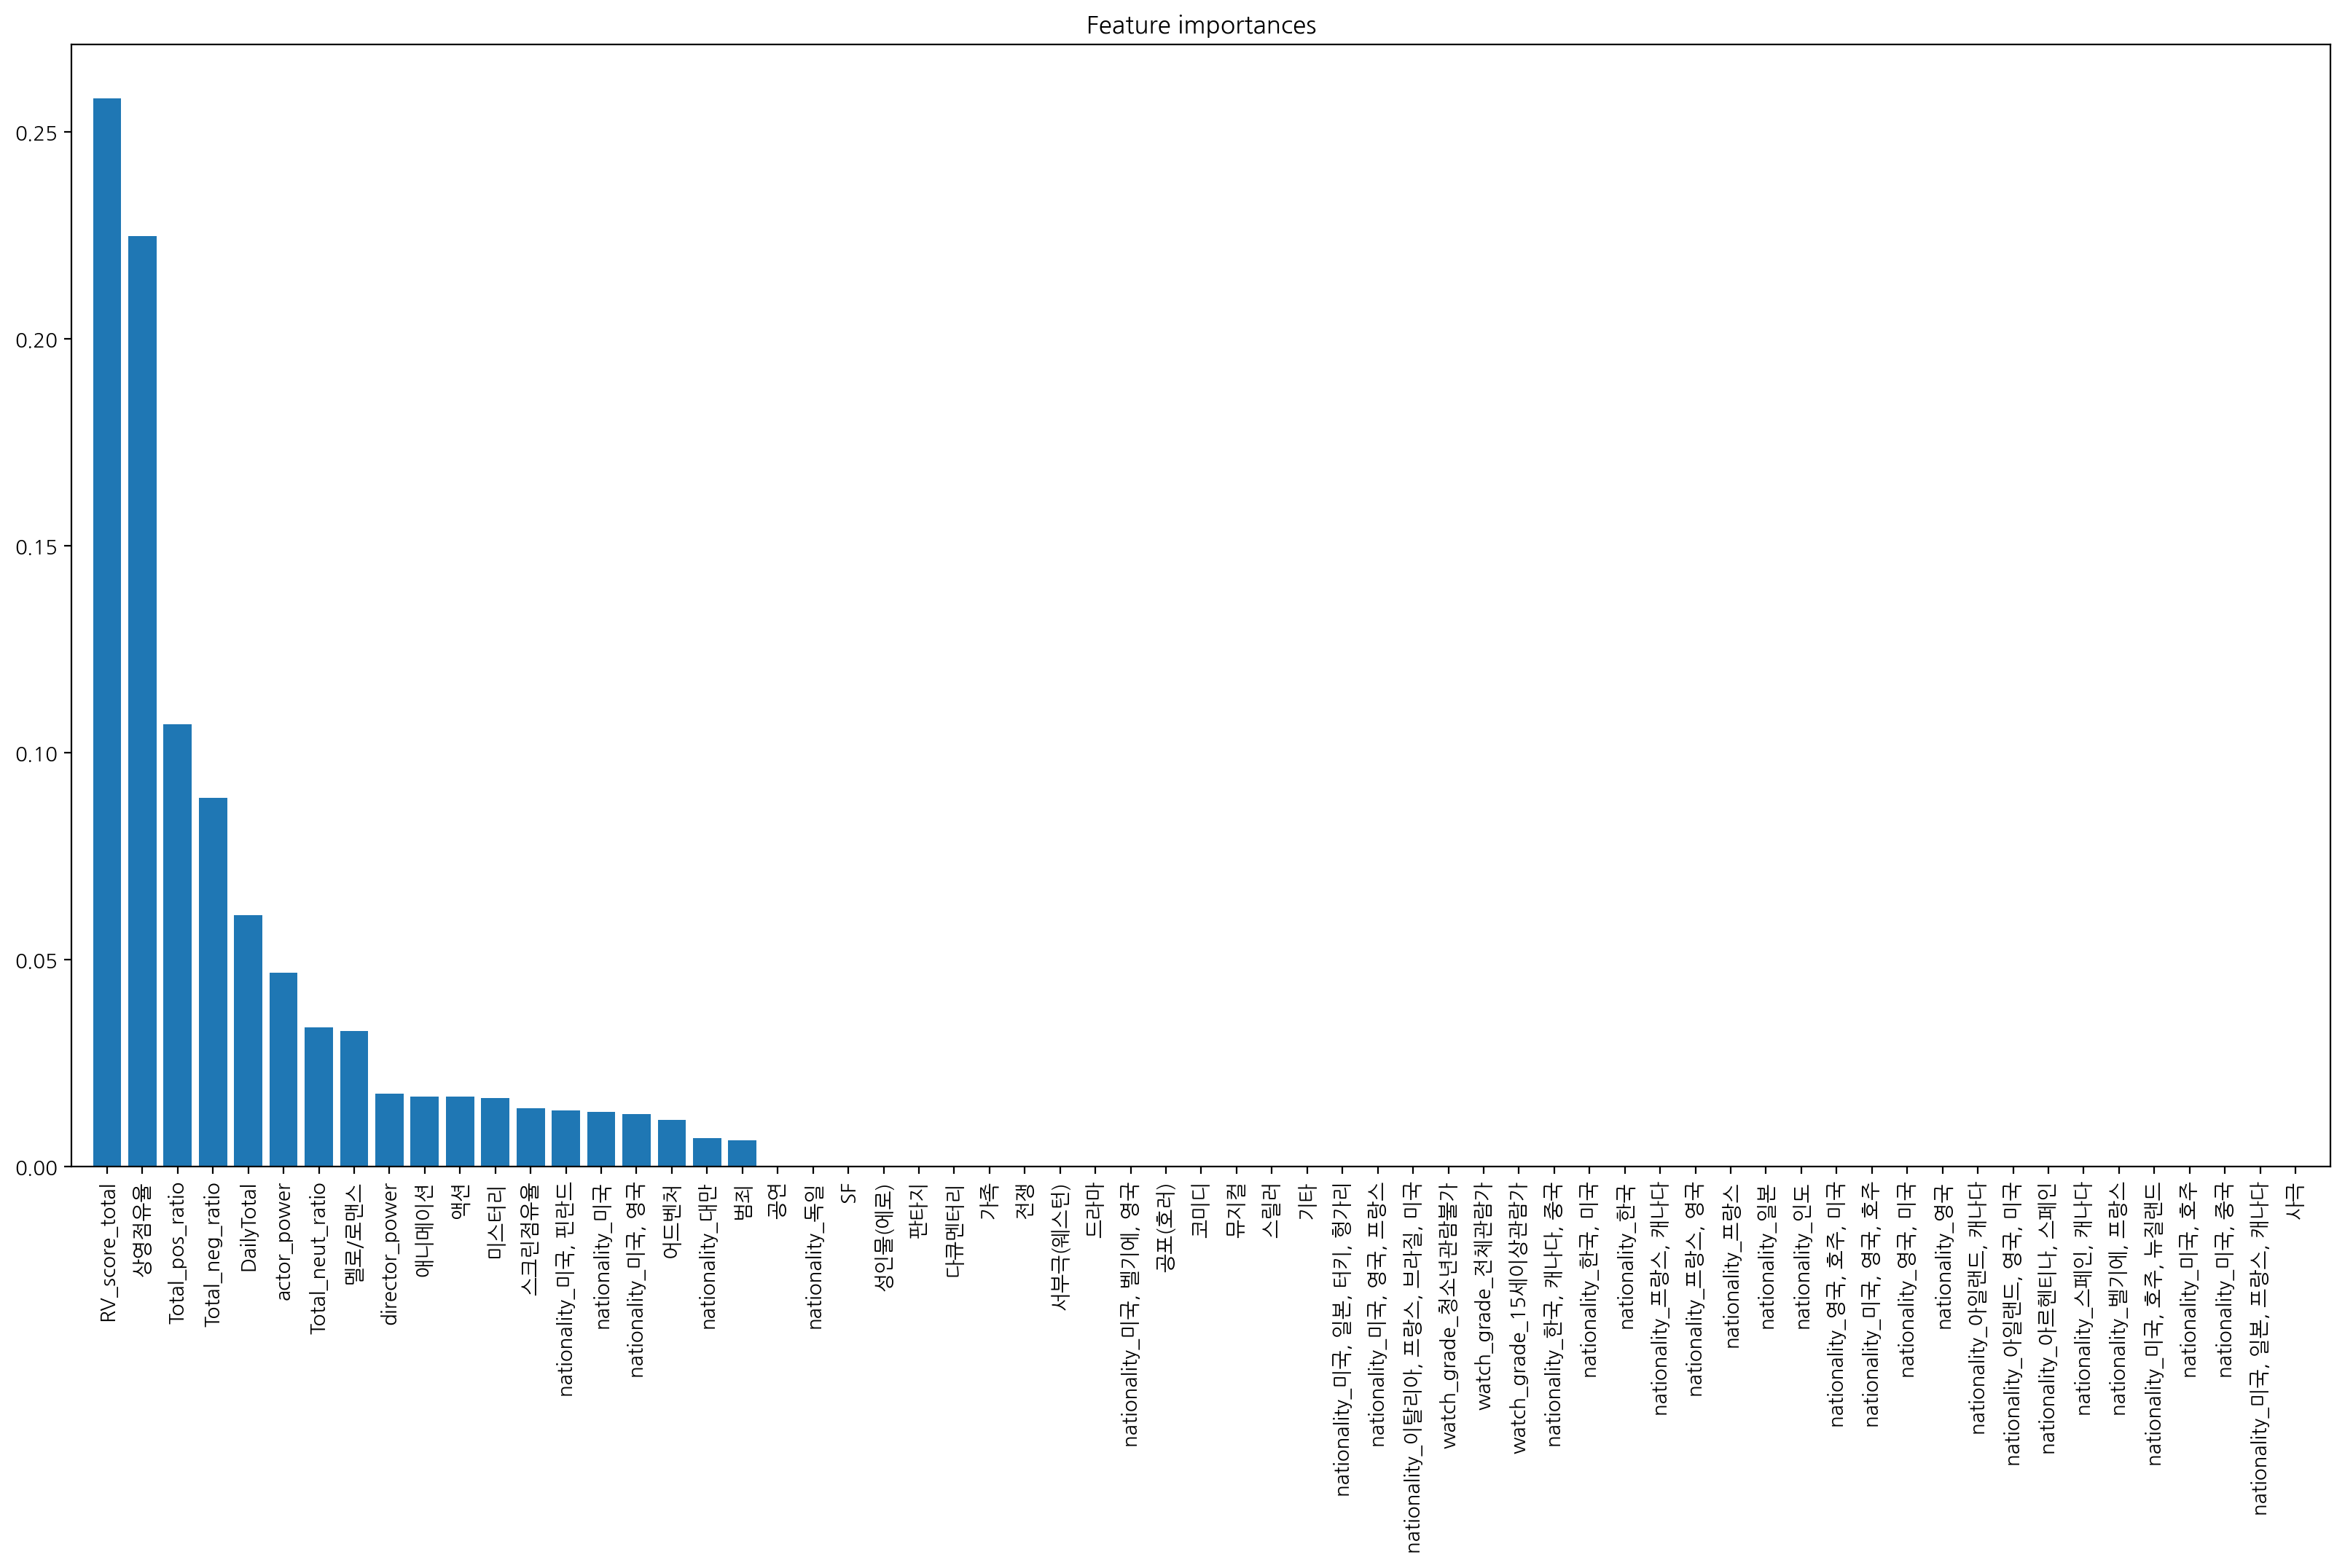

In [280]:
# feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
